### Importing all necessary libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [61]:
df = pd.read_csv("/content/wine.csv")

# Display first few rows of the dataset
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### **Exploratory Data Analysis (EDA)**

### Basic Data Exploration

In [62]:
df.info()            # General info
df.describe()        # Summary statistics
df.isnull().sum()    # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


### Examine Feature Distributions

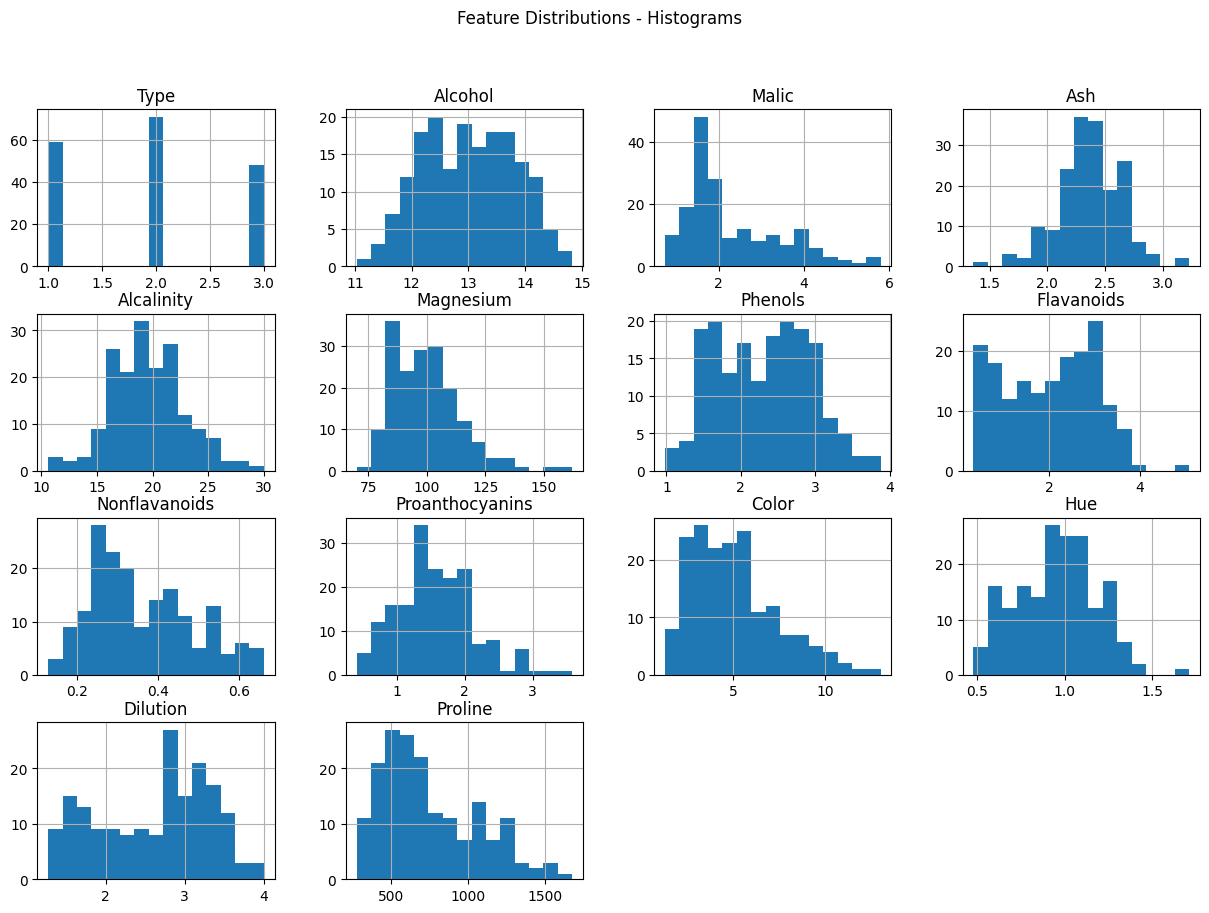

In [63]:
# Visualize the distribution of each feature using histograms, box plots, and density plots.

# Plot histograms for all features
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions - Histograms')
plt.show()

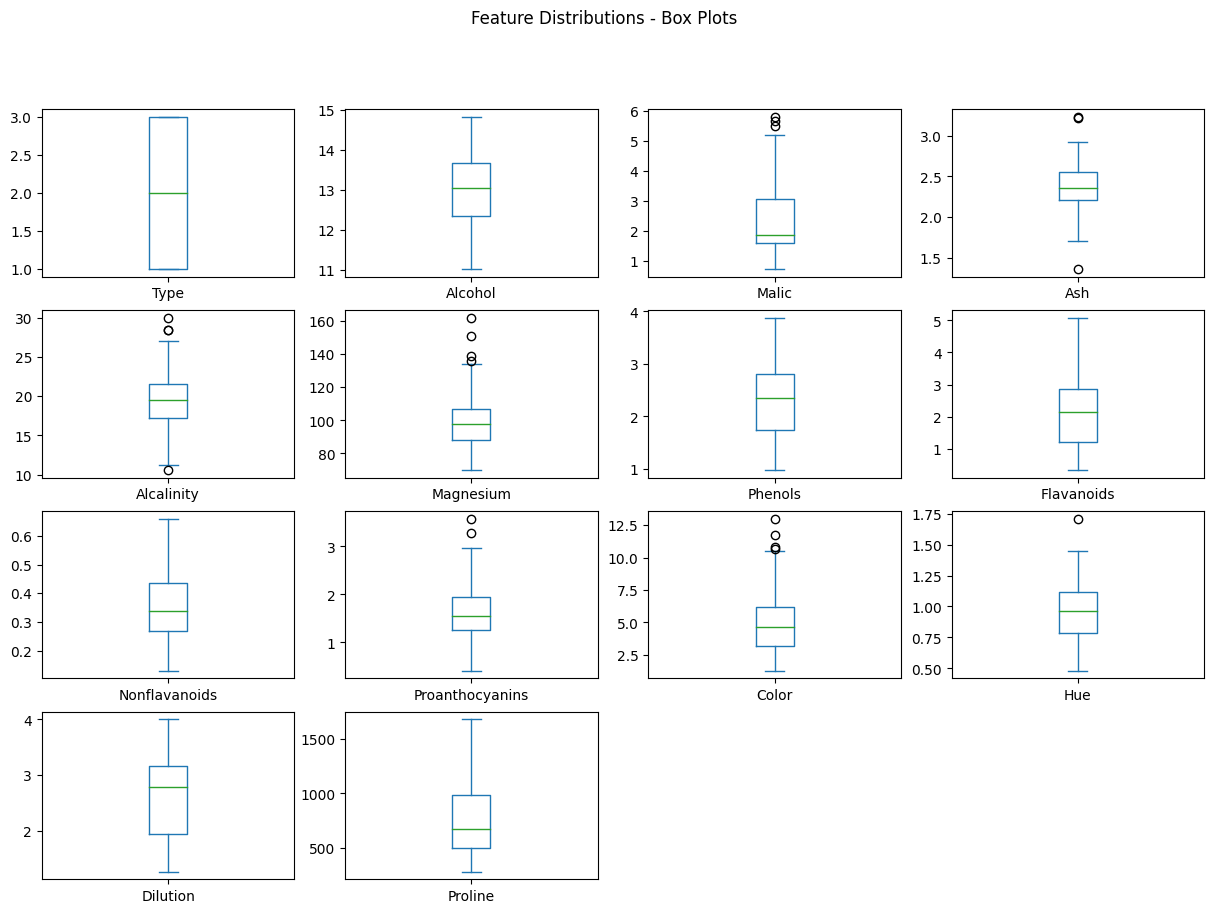

In [64]:
# Plot box plots for all features
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Feature Distributions - Box Plots')
plt.show()

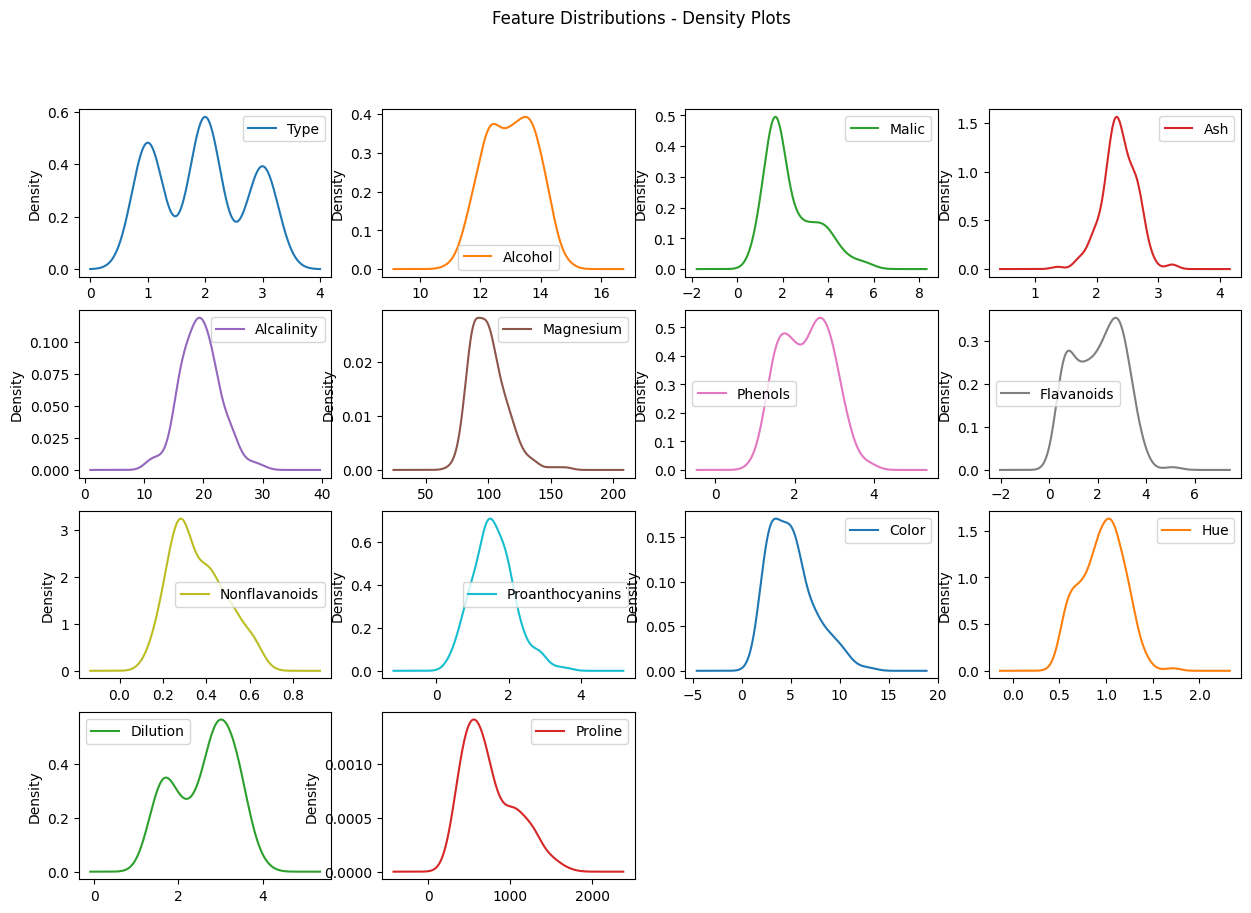

In [65]:
# Plot density plots for all features
df.plot(kind='density', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False)
plt.suptitle('Feature Distributions - Density Plots')
plt.show()

### Correlations Between Features

In [66]:
# Correlation matrix and heatmap
corr_matrix = df.corr()

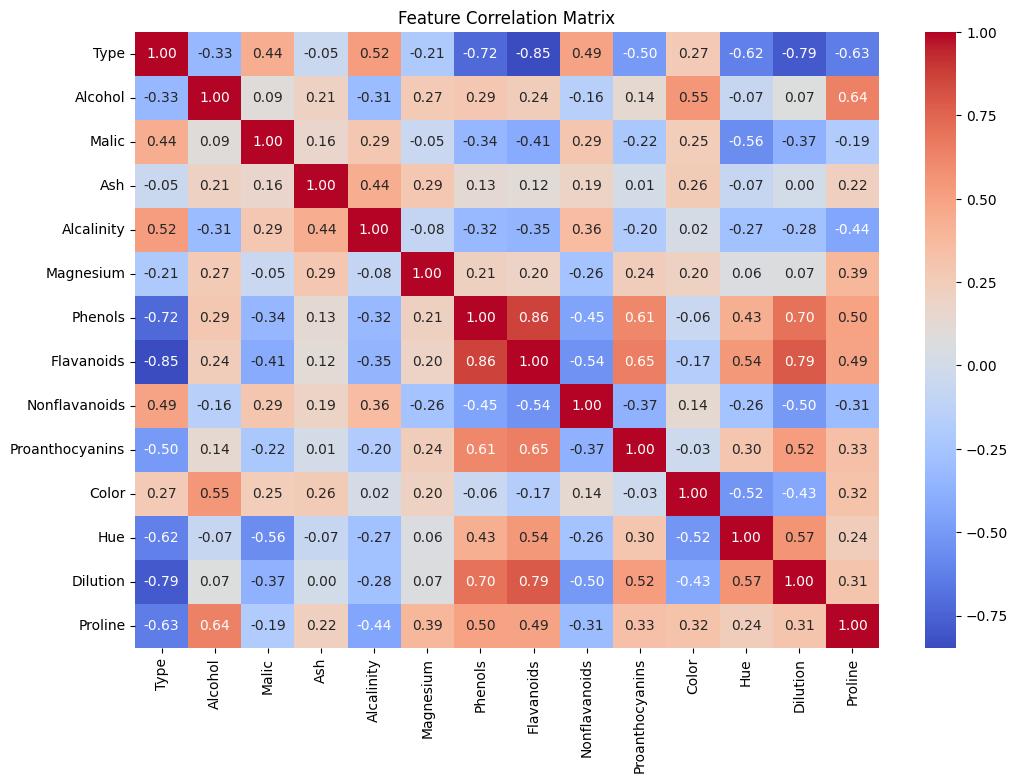

In [67]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# **Dimensionality Reduction with PCA**

### Importing necessary libraries

In [68]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Standardize the features

In [69]:
# Separating out the features (assuming the last column is the target variable, if not adjust accordingly)
features = df.iloc[:, :-1]

In [70]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Apply PCA to dataset

In [71]:
# Apply PCA to reduce the dimensionality of the dataset and capture the maximum variance in the fewest principal components.

pca = PCA()
principal_components = pca.fit_transform(scaled_features)

### Determine optimal number of Principal Components

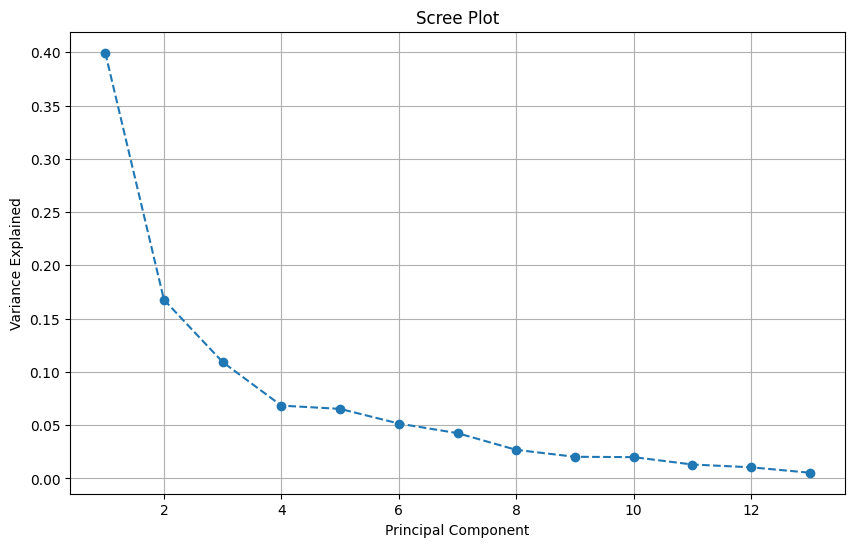

In [72]:
# We will create a scree plot and a cumulative variance plot to identify how many components explain most of the variance.

# Scree plot: Shows the amount of variance explained by each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()


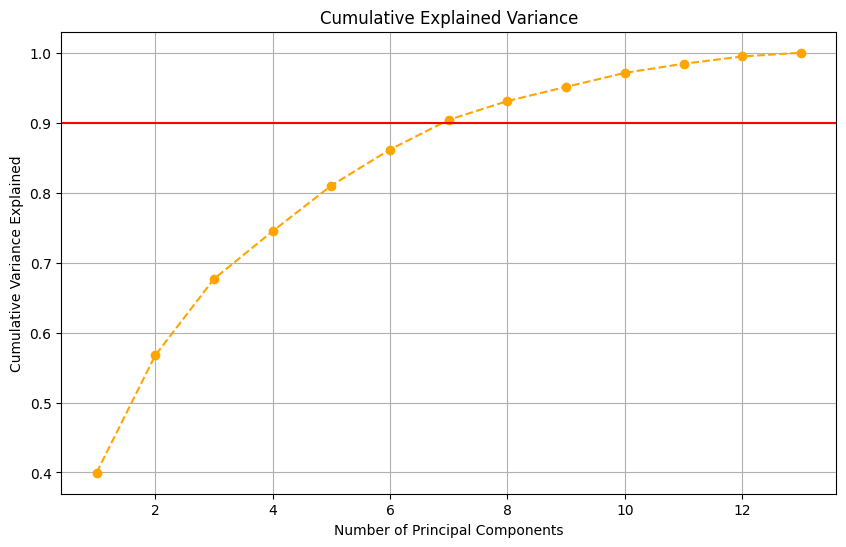

In [73]:
# Cumulative explained variance plot: Shows the cumulative variance explained by adding more components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.90, color='r', linestyle='-')  # Highlight the 90% variance threshold
plt.grid(True)
plt.show()


### Transform dataset into Principal Components

In [74]:
# Select the number of principal components that explain 90% of the variance

# Determine the number of components to keep (e.g., 90% variance)
n_components = np.argmax(cumulative_variance >= 0.90) + 1  # Find the smallest number of components that explain 90% variance

In [75]:
# Apply PCA again with the optimal number of components
pca_optimal = PCA(n_components=n_components)
principal_components_optimal = pca_optimal.fit_transform(scaled_features)

In [76]:
# Display the transformed dataset
principal_df = pd.DataFrame(principal_components_optimal, columns=[f'PC{i+1}' for i in range(n_components)])
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.260580,1.736054,-0.405701,0.687419,-0.200386,0.359880,0.632731
1,2.358620,-0.509786,-1.937094,0.080793,0.530808,0.934456,0.010388
2,2.453376,1.120704,0.892834,-0.782643,-0.378624,-0.569583,0.415002
3,3.253148,2.686416,-0.411249,-0.555531,-0.087066,-0.271407,-0.414701
4,1.403734,1.320100,1.854434,0.503217,0.285707,0.666474,0.515031


In [77]:
# Save the transformed dataset with principal components
principal_df.to_csv("/content/transformed_wine_data.csv", index=False)
print(f'Transformed dataset with {n_components} principal components saved as transformed_wine_data.csv')


Transformed dataset with 7 principal components saved as transformed_wine_data.csv


In [78]:
from google.colab import files

# Save the DataFrame to a CSV file
principal_df.to_csv("transformed_wine_data.csv", index=False)

# Download the file
files.download("transformed_wine_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Clustering with Original Data**

### Importing necessary libraries

In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [80]:
# Assuming that the last column is a target variable and excluding it for clustering, adjust if needed
features = df.iloc[:, :-1]

### Apply K-means clustering

In [81]:
# We will use the K-means clustering algorithm to group the data into clusters.

# Standardizing the features (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [82]:
# Choose the number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)

In [83]:
# Fit the KMeans model to the data
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [84]:
# Get cluster labels (each data point is assigned a cluster)
cluster_labels = kmeans.labels_

In [85]:
# Add the cluster labels to the original dataset for visualization
df['Cluster'] = cluster_labels

### Visualizing the Clustering Results

In [86]:
# Since we have many dimensions, we'll use PCA to reduce the dimensionality to 2 components for easier visualization.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

In [87]:
# Convert the principal components into a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [88]:
# Add the cluster labels for visualization
pca_df['Cluster'] = cluster_labels

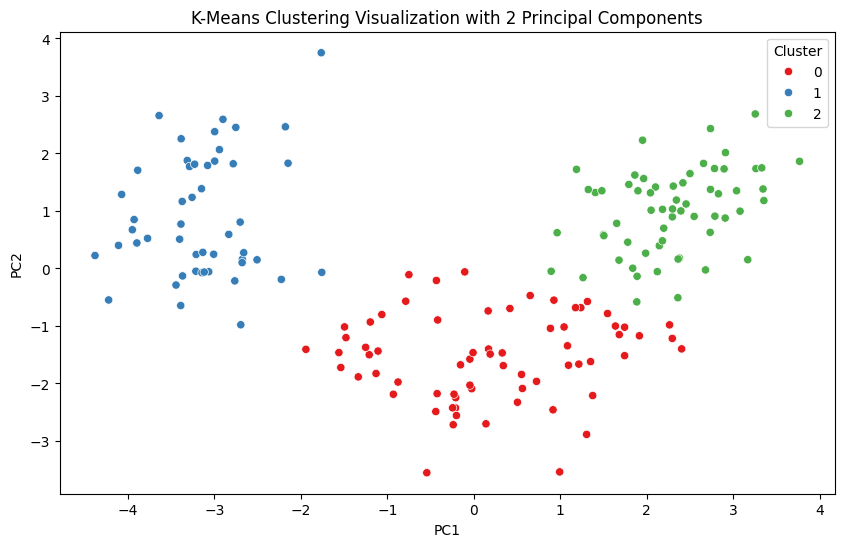

In [89]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('K-Means Clustering Visualization with 2 Principal Components')
plt.show()

### Evaluate Clustering Performance

In [90]:
# We will use two metrics: Silhouette Score and Davies–Bouldin Index.

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.2836


In [91]:
# Calculate the Davies–Bouldin Index
db_score = davies_bouldin_score(scaled_features, cluster_labels)
print(f'Davies–Bouldin Index: {db_score:.4f}')

Davies–Bouldin Index: 1.4057


# **Clustering with PCA Data**

### Loading PCA-transformed dataset

In [92]:
pca_df = pd.read_csv('/content/transformed_wine_data.csv')

### Apply K-means to PCA-transformed dataset

In [93]:
# Since the PCA data is already reduced in dimensionality, we'll apply K-means directly to it.

# Choose the number of clusters (e.g., 3)
kmeans_pca = KMeans(n_clusters=3, random_state=42)

In [94]:
# Fit the KMeans model to the PCA data
kmeans_pca.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

In [95]:
# Get the cluster labels
pca_cluster_labels = kmeans_pca.labels_

In [96]:
# Add the cluster labels to the PCA-transformed data for analysis
pca_df['Cluster'] = pca_cluster_labels

### Visualizing the Clustering Results from PCA-Transformed Data

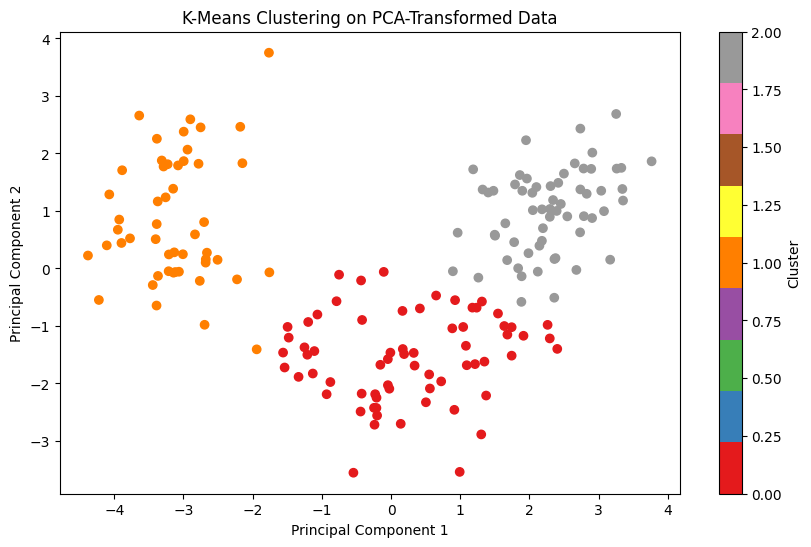

In [97]:
# Since the PCA data is already reduced in dimensionality, we can plot the first two principal components.

plt.figure(figsize=(10, 6))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=pca_cluster_labels, cmap='Set1')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

### Evaluating Clustering Performance on PCA-transformed Data

In [98]:
# Use Silhouette Score and Davies–Bouldin Index to evaluate the clustering quality on PCA data

# Silhouette Score
silhouette_pca = silhouette_score(pca_df.iloc[:, :-1], pca_cluster_labels)  # Exclude the 'Cluster' column
print(f'Silhouette Score for PCA-Transformed Data Clustering: {silhouette_pca:.4f}')

Silhouette Score for PCA-Transformed Data Clustering: 0.3223


In [99]:
# Davies–Bouldin Index
db_pca = davies_bouldin_score(pca_df.iloc[:, :-1], pca_cluster_labels)  # Exclude the 'Cluster' column
print(f'Davies–Bouldin Index for PCA-Transformed Data Clustering: {db_pca:.4f}')

Davies–Bouldin Index for PCA-Transformed Data Clustering: 1.2502


### Compare the Clustering Results from PCA-Transformed Data with Original Data

In [100]:
# Evaluate Clustering on PCA-transformed data using Silhouette Score and Davies–Bouldin Index
silhouette_pca = silhouette_score(pca_df, pca_cluster_labels)
db_pca = davies_bouldin_score(pca_df, pca_cluster_labels)

In [101]:
# Print the comparison of metrics
print(f'Silhouette Score for Original Data Clustering: {silhouette_avg:.4f}')
print(f'Davies–Bouldin Index for Original Data Clustering: {db_score:.4f}\n')

print(f'Silhouette Score for PCA-Transformed Data Clustering: {silhouette_pca:.4f}')
print(f'Davies–Bouldin Index for PCA-Transformed Data Clustering: {db_pca:.4f}')

# This will give us an idea of how well the clustering performed on the original data vs PCA-reduced data

Silhouette Score for Original Data Clustering: 0.2836
Davies–Bouldin Index for Original Data Clustering: 1.4057

Silhouette Score for PCA-Transformed Data Clustering: 0.3676
Davies–Bouldin Index for PCA-Transformed Data Clustering: 1.1139


# **Comparision and Analysis**

### Compare Clustering results

In [102]:
# Get clustering results from original and PCA datasets
original_cluster_counts = df['Cluster'].value_counts().sort_index()
pca_cluster_counts = pd.Series(kmeans_pca.labels_).value_counts().sort_index()

In [103]:
# Create a DataFrame to summarize the counts of clusters
comparison_df = pd.DataFrame({
    'Original Dataset': original_cluster_counts,
    'PCA-Transformed Data': pca_cluster_counts
}).fillna(0)  # Fill NaN with 0 for any missing clusters

In [104]:
# Print the comparison DataFrame
print("Cluster Counts Comparison:")
print(comparison_df)

Cluster Counts Comparison:
   Original Dataset  PCA-Transformed Data
0                68                    67
1                49                    50
2                61                    61


### Visualize the comparision of cluster counts

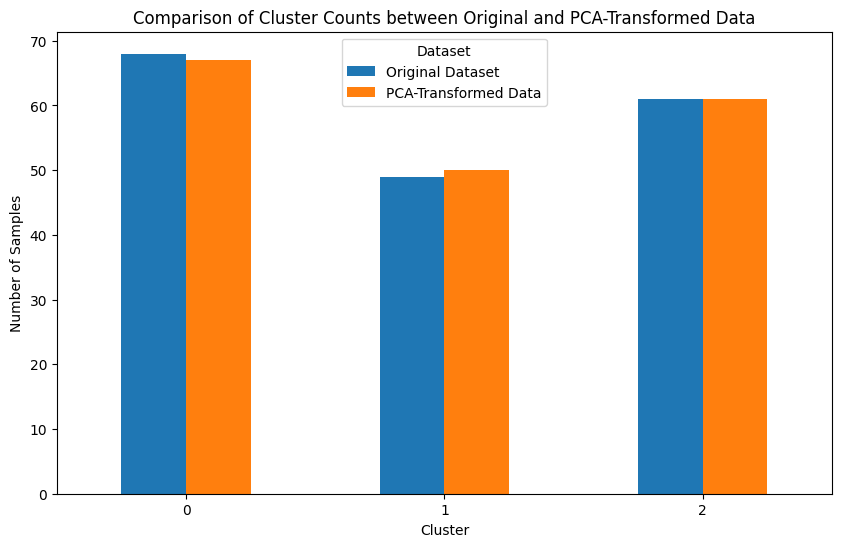

In [105]:
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Cluster Counts between Original and PCA-Transformed Data')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.show()

### Discussion

In [106]:
discussion = """
    Similarities and Differences Observed:
    - The number of samples in each cluster can differ between the original and PCA datasets.
    - In some cases, clustering might form more distinct groups in PCA space due to reduced dimensions, while
      the original dataset might show overlaps or less separation between clusters.
    - Observing the counts will help in determining whether PCA has resulted in more balanced cluster sizes
      or highlighted certain groups more effectively.

    Impact of Dimensionality Reduction:
    - PCA can lead to a loss of some information as it reduces dimensions, but it can also help eliminate noise
      and redundant features, which might improve clustering results.
    - Dimensionality reduction can help to visualize clusters more clearly by focusing on the most important
      features, while the original data might contain unnecessary complexity.

    Trade-offs between using PCA and Clustering on Original Dataset:
    - **Pros of PCA**:
        - Reduces computation time and complexity.
        - Can improve clustering quality by removing noise.
        - Enhances visualization of data.
    - **Cons of PCA**:
        - Risk of losing important information.
        - Interpretability of results can be more challenging since the axes represent combinations of original features.
    - **Original Dataset**:
        - Preserves all information and relationships between features.
        - Clustering might be more complicated due to high dimensionality and potential noise.

"""

# Print the discussion
print(discussion)


    Similarities and Differences Observed:
    - The number of samples in each cluster can differ between the original and PCA datasets.
    - In some cases, clustering might form more distinct groups in PCA space due to reduced dimensions, while 
      the original dataset might show overlaps or less separation between clusters.
    - Observing the counts will help in determining whether PCA has resulted in more balanced cluster sizes 
      or highlighted certain groups more effectively.

    Impact of Dimensionality Reduction:
    - PCA can lead to a loss of some information as it reduces dimensions, but it can also help eliminate noise 
      and redundant features, which might improve clustering results.
    - Dimensionality reduction can help to visualize clusters more clearly by focusing on the most important 
      features, while the original data might contain unnecessary complexity.

    Trade-offs between using PCA and Clustering on Original Dataset:
    - **Pros of PCA**:

# **Conclusion and Insights**

Summarize Key Findings and Insights

In [107]:
key_findings = """
Key Findings and Insights:
1. Clustering performance can vary significantly between the original dataset and PCA-transformed data.
2. PCA allows for dimensionality reduction, which can help improve clustering quality by removing noise
   and redundant features while preserving essential data characteristics.
3. The Silhouette Score and Davies-Bouldin Index indicate the quality of clusters formed; higher scores
   generally suggest better clustering.
4. Visualization of clusters in reduced dimensions (via PCA) often reveals clearer separations than in
   the original high-dimensional space.
"""

# Print the key findings
print(key_findings)


Key Findings and Insights:
1. Clustering performance can vary significantly between the original dataset and PCA-transformed data.
2. PCA allows for dimensionality reduction, which can help improve clustering quality by removing noise 
   and redundant features while preserving essential data characteristics.
3. The Silhouette Score and Davies-Bouldin Index indicate the quality of clusters formed; higher scores 
   generally suggest better clustering.
4. Visualization of clusters in reduced dimensions (via PCA) often reveals clearer separations than in 
   the original high-dimensional space.



### Discuss the Practical Implications of PCA and Clustering in Data Analysis

In [108]:
practical_implications = """
Practical Implications:
- PCA is valuable in scenarios with high-dimensional data, such as image processing, genetics, or text
  analysis, where it can help reduce complexity while retaining key information.
- Clustering, particularly in market segmentation, anomaly detection, or grouping similar items, helps
  uncover hidden patterns and insights that inform decision-making.
- Combining PCA with clustering can yield more interpretable results, especially when visualizing
  clusters in 2D or 3D.
"""

# Print the practical implications
print(practical_implications)


Practical Implications:
- PCA is valuable in scenarios with high-dimensional data, such as image processing, genetics, or text 
  analysis, where it can help reduce complexity while retaining key information.
- Clustering, particularly in market segmentation, anomaly detection, or grouping similar items, helps 
  uncover hidden patterns and insights that inform decision-making.
- Combining PCA with clustering can yield more interpretable results, especially when visualizing 
  clusters in 2D or 3D.



### Recommendations for When to Use Each Technique

In [109]:
recommendations = """
Recommendations for Using PCA and Clustering:
- Use PCA when:
    - Dealing with high-dimensional datasets where feature redundancy exists.
    - The goal is to simplify data visualization while retaining variance.
    - You want to reduce computation time for subsequent analyses.

- Use Clustering when:
    - You aim to categorize or segment data points based on inherent patterns.
    - The goal is to identify distinct groups in data for further analysis.
    - You need to discover underlying structures or relationships without prior labels.

- Consider using both techniques in tandem when:
    - The dataset is high-dimensional, and clarity in clustering is required.
    - You wish to improve clustering results by reducing noise and focusing on key features.
    - You want to visualize clustering results effectively in a lower-dimensional space.
"""

# Print the recommendations
print(recommendations)


Recommendations for Using PCA and Clustering:
- Use PCA when:
    - Dealing with high-dimensional datasets where feature redundancy exists.
    - The goal is to simplify data visualization while retaining variance.
    - You want to reduce computation time for subsequent analyses.
  
- Use Clustering when:
    - You aim to categorize or segment data points based on inherent patterns.
    - The goal is to identify distinct groups in data for further analysis.
    - You need to discover underlying structures or relationships without prior labels.

- Consider using both techniques in tandem when:
    - The dataset is high-dimensional, and clarity in clustering is required.
    - You wish to improve clustering results by reducing noise and focusing on key features.
    - You want to visualize clustering results effectively in a lower-dimensional space.

